In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

##### 군집 알고리즘 비교와 평가

- 타겟값으로 군집 평가
    - ARI / NMI: 군집이 최적일 때 점수 1로 주고, 무작위로 분류된 군집일 경우 점수 0으로 줌, 0-1 사이 값으로 줌
        - ARI 점수가 음수로 나올수도 있음

In [71]:
from sklearn.metrics.cluster import adjusted_rand_score

In [72]:
x, y = make_moons(n_samples = 200, noise =0.05, random_state=0)

In [73]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [74]:
#군집분석 알고리즘 모델 리스트 만들기
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
                DBSCAN()]

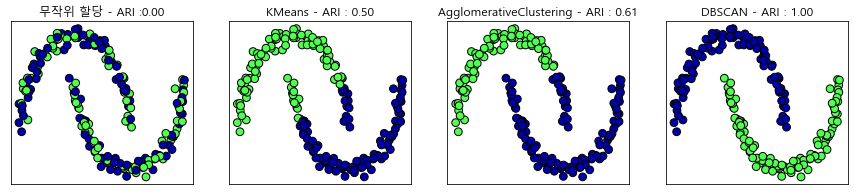

In [75]:
fig,axes =plt.subplots(1, 4, figsize=(15,3),  subplot_kw={'xticks':(), 'yticks':()})
#군집분석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당한 것 
random_state=np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=(len(x_scaled)))

#무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI :{:.2f}'.format(adjusted_rand_score(y, random_clusters)))   

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - ARI : {:.2f}'.format(algorithm.__class__.__name__,adjusted_rand_score(y, clusters))) 


In [76]:
from sklearn.metrics import accuracy_score

#0과 1로 이루어진 군집?
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

In [77]:
print('정확도 : {:.2f}'.format(accuracy_score(cluster1, cluster2)))

정확도 : 0.00


In [78]:
print('ARI : {:.2f}'.format(adjusted_rand_score(cluster1, cluster2)))

ARI : 1.00


- 군집분석에서는 accuracy 사용하면 안됨
- ARI/NMI를 사용해야함

- 실루엣 지수
    - 이 지표는 좀 정확하지 않은 점수
    - 클러스터의 밀집정도를 계산하는 값
    - 점수가 높을수록 좋고 최대점수 1
    - 데이터가 복잡할 대는 밀집도를 활용한 점수가 잘 안맞음
    - -1일때 완전 잘못된 군집, 0은 중첩된 군집, 1은 잘 구분된 군집

In [79]:
from sklearn.metrics.cluster import silhouette_score

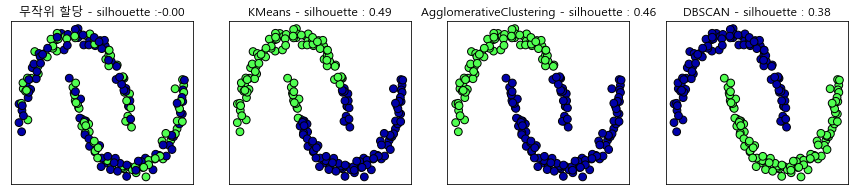

In [80]:
fig,axes =plt.subplots(1, 4, figsize=(15,3),  subplot_kw={'xticks':(), 'yticks':()})
#군집분석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당한 것 
random_state=np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=(len(x_scaled)))

#무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - silhouette :{:.2f}'.format(silhouette_score(x_scaled, random_clusters)))   

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - silhouette : {:.2f}'.format(algorithm.__class__.__name__, silhouette_score(x_scaled, clusters)))

- 군집모델이 안정적이거나 실루엣 점수가 높다고 하더라도, 군집에 어떤 유의미한 것이 있는지나 군집이 데이터의 흥미로운 feature를 반영하고 있는지 알 수 없음
    - 실루엣 잘 작동x